In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

In [2]:
#İstenen sütunları bir pandas dataframe içerisine alındı
cancer = pd.read_csv("clinical.tsv", sep="\t")
cancer.replace("'--", np.nan, inplace=True) # -- değerlerin nan olarak alınması
selectedColumns = ['case_submitter_id',
                    'age_at_index',
                    'days_to_death',
                    'gender',
                    'race',
                    'vital_status',
                    'year_of_birth',
                    'year_of_death',
                    'age_at_diagnosis',
                    'ajcc_pathologic_stage',
                    'icd_10_code',
                    'primary_diagnosis',
                    'prior_malignancy', 
                    'prior_treatment',
                    'site_of_resection_or_biopsy',
                    'synchronous_malignancy',
                    'tissue_or_organ_of_origin',
                    'year_of_diagnosis',
                    'treatment_type']
cancer = cancer[selectedColumns]
cancer.head()

,case_submitter_id,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
0,TCGA-A8-A093,61,NaN,female,not reported,Alive,1948,NaN,22373,Stage IIA,C50.9,"Infiltrating duct carcinoma, NOS",yes,No,"Breast, NOS",Not Reported,"Breast, NOS",2009,"Radiation Therapy, NOS"
1,TCGA-A8-A093,61,NaN,female,not reported,Alive,1948,NaN,22373,Stage IIA,C50.9,"Infiltrating duct carcinoma, NOS",yes,No,"Breast, NOS",Not Reported,"Breast, NOS",2009,"Pharmaceutical Therapy, NOS"
2,TCGA-V1-A9OT,61,NaN,male,white,Alive,NaN,NaN,22630,NaN,C61,"Adenocarcinoma, NOS",no,No,Prostate gland,No,Prostate gland,NaN,"Radiation Therapy, NOS"
3,TCGA-V1-A9OT,61,NaN,male,white,Alive,NaN,NaN,22630,NaN,C61,"Adenocarcinoma, NOS",no,No,Prostate gland,No,Prostate gland,NaN,"Pharmaceutical Therapy, NOS"
4,TCGA-QS-A5YR,61,NaN,female,black or african american,Alive,1951,NaN,22372,NaN,C54.1,"Endometrioid adenocarcinoma, NOS",no,No,Endometrium,No,Endometrium,2012,"Radiation Therapy, NOS"


In [3]:
#Nümerik değer dönüşümü.
cancer["age_at_index"] = pd.to_numeric(cancer["age_at_index"])
cancer["days_to_death"] = pd.to_numeric(cancer["days_to_death"])
cancer["year_of_birth"] = pd.to_numeric(cancer["year_of_birth"])
cancer["year_of_death"] = pd.to_numeric(cancer["year_of_death"])
cancer["age_at_diagnosis"] = pd.to_numeric(cancer["age_at_diagnosis"])
cancer["year_of_diagnosis"] = pd.to_numeric(cancer["year_of_diagnosis"])

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18962 entries, 0 to 18961
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_submitter_id            18962 non-null  object 
 1   age_at_index                 18858 non-null  float64
 2   days_to_death                5898 non-null   float64
 3   gender                       18962 non-null  object 
 4   race                         18962 non-null  object 
 5   vital_status                 18962 non-null  object 
 6   year_of_birth                18648 non-null  float64
 7   year_of_death                4276 non-null   float64
 8   age_at_diagnosis             18736 non-null  float64
 9   ajcc_pathologic_stage        12342 non-null  object 
 10  icd_10_code                  18808 non-null  object 
 11  primary_diagnosis            18962 non-null  object 
 12  prior_malignancy             18962 non-null  object 
 13  prior_treatment 

In [4]:
beforeDropShape = cancer.shape
cancer.dropna(1, how="all", inplace=True) # sütundaki tüm değerler NaN ise sütunu sil
afterDropShape = cancer.shape
print(f"Tüm değerleri null olan sütun sayısı: {beforeDropShape[1] - afterDropShape[1]}")

Tüm değerleri null olan sütun sayısı: 0


In [5]:
beforeDropShape = cancer.shape
cancer.dropna(0, how="any", inplace=True) # sutunda herhangi bir NaN değer var ise sütunu sil
afterDropShape = cancer.shape
print(f"Herhangi bir null değeri olan satır sayısı: {beforeDropShape[0] - afterDropShape[0]}")


Herhangi bir null değeri olan satır sayısı: 16402


In [6]:
def ejectNotReportedData(data): #Eğer not reported ya da Not Reported yazan bir veri varsa o verinin olduğu satırları silen method 
    data = data.copy()
    for column in data.columns:
        lower = (data[column] == "not reported").any()
        capital = (data[column] == "Not Reported").any()

        if lower or capital:
            data.drop(column, axis=1, inplace=True)
    return data


beforeDropShape = cancer.shape
cancer = ejectNotReportedData(cancer)
afterDropShape = cancer.shape

print(f"Raporlanmamış bilgi içeren sütun sayısı: {beforeDropShape[1] - afterDropShape[1]}")

Raporlanmamış bilgi içeren sütun sayısı: 3


In [7]:
beforeDropShape = cancer.shape
cancer.drop_duplicates(subset="case_submitter_id", keep="first", inplace=True) # tekrar eden hasta barkodlarından sadece ilk veriyi tut
afterDropShape = cancer.shape
print(f"Silinen satır sayısı: {beforeDropShape[0] - afterDropShape[0]}")

Silinen satır sayısı: 1280


In [8]:
cancer.set_index("case_submitter_id", inplace=True) #case_submitter_id dataframenin indexi yapıldı
print(f"Satır sayısı: {cancer.shape[0]}\nSütun sayısı: {cancer.shape[1]}")

Satır sayısı: 1280
Sütun sayısı: 15


<Figure size 432x288 with 0 Axes>

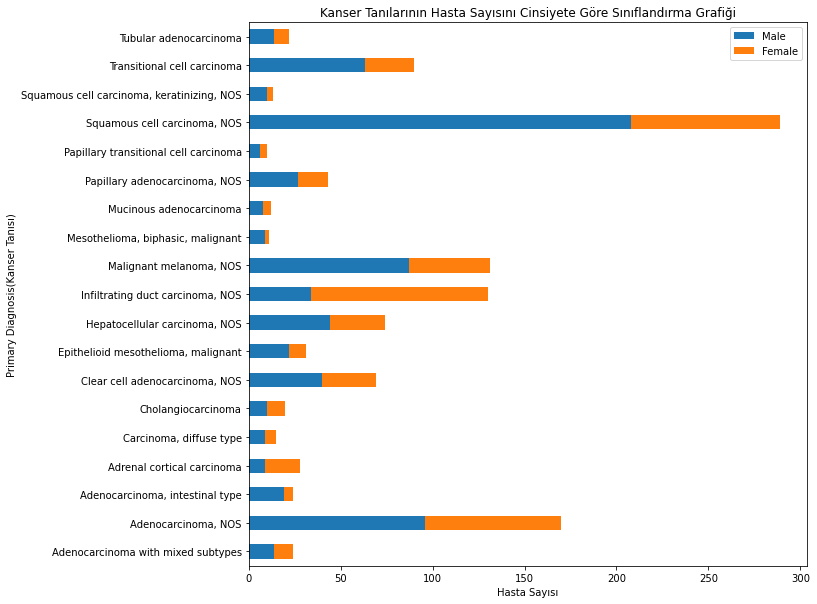

In [9]:
import matplotlib.pyplot as plt

groupData = cancer.groupby(by=["primary_diagnosis", "gender"]).size() #Birincil tanıyı cinsiyete göre gruplama işlemi

groupData = groupData.unstack()
groupData = groupData[(groupData.female + groupData.male) >= 10]

plt.figure()

groupData[["male", "female"]].plot(kind='barh', stacked=True, figsize=(10,10))  #Yatay bar grafiği oluşturma

plt.legend(["Male", "Female"])
plt.title("Kanser Tanılarının Hasta Sayısını Cinsiyete Göre Sınıflandırma Grafiği")
plt.ylabel("Primary Diagnosis(Kanser Tanısı)")
plt.xlabel('Hasta Sayısı')

plt.show()

In [10]:
groupData = cancer.groupby(by="primary_diagnosis").size().sort_values(ascending=False) #Kanser türlerine göre kaç hasta olduğunun sayılarına göre azalan sırada sortlanmış hali
print(groupData)
top10_diagnosis = groupData.keys()[:10] #en çok hasta görülen 10 kanser türünü bir değişkene aldık
cancer_filtered_with_top10_diag = cancer[cancer["primary_diagnosis"].isin(top10_diagnosis)]

primary_diagnosis
Squamous cell carcinoma, NOS                                 289
Adenocarcinoma, NOS                                          170
Malignant melanoma, NOS                                      131
Infiltrating duct carcinoma, NOS                             130
Transitional cell carcinoma                                   90
Hepatocellular carcinoma, NOS                                 74
Clear cell adenocarcinoma, NOS                                69
Papillary adenocarcinoma, NOS                                 43
Epithelioid mesothelioma, malignant                           31
Adrenal cortical carcinoma                                    28
Adenocarcinoma with mixed subtypes                            24
Adenocarcinoma, intestinal type                               24
Tubular adenocarcinoma                                        22
Cholangiocarcinoma                                            20
Carcinoma, diffuse type                                       15
Squamou

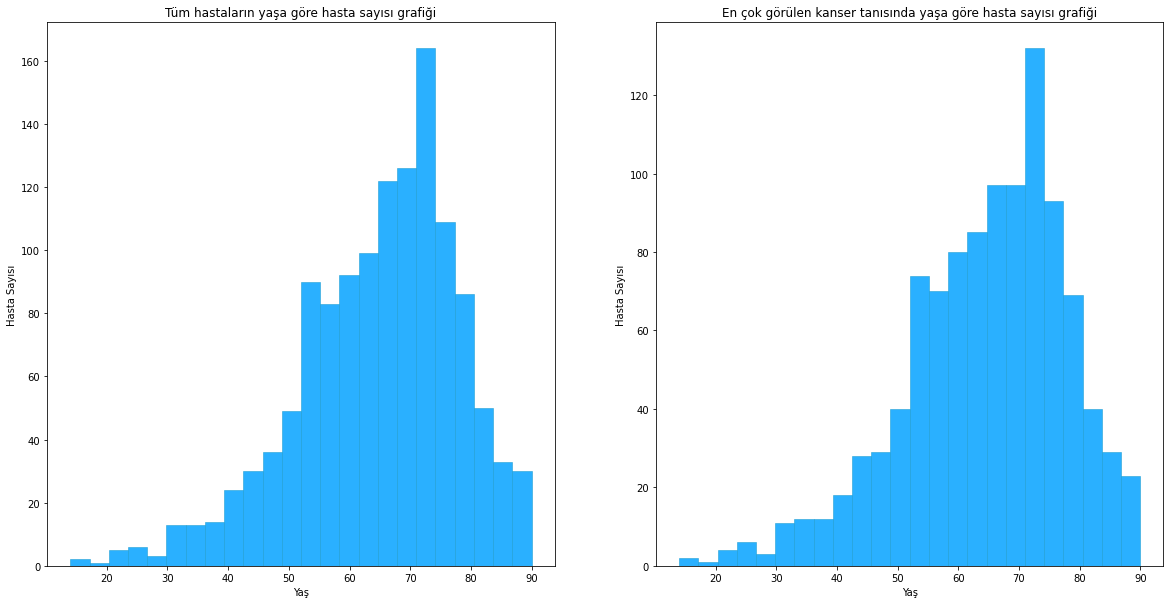

In [11]:
fig = plt.figure(figsize=(20,10))

#ideal bins değeri hesaplandı.
q25, q75 = np.percentile(cancer.age_at_index, [25, 75])
bin_width = 2 * (q75 - q25) * len(cancer.age_at_index) ** (-1/3) 
bins = round((cancer.age_at_index.max() - cancer.age_at_index.min()) / bin_width)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Tüm hastaların yaşa göre hasta sayısı grafiği")
ax1.set_xlabel("Yaş")
ax1.set_ylabel("Hasta Sayısı")

plt.hist(cancer.age_at_index, bins=bins, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("En çok görülen kanser tanısında yaşa göre hasta sayısı grafiği")
ax2.set_xlabel("Yaş")
ax2.set_ylabel("Hasta Sayısı")

plt.hist(cancer_filtered_with_top10_diag.age_at_index, bins=bins, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

plt.show()

In [12]:
longest = list(cancer.groupby(by="primary_diagnosis", group_keys=False)["days_to_death"].mean().sort_values(ascending=False)[:1].items())

print(f"En uzun yaşam süresi ortalaması {longest[0][1]:.0f} gün ile {longest[0][0]}.")

En uzun yaşam süresi ortalaması 5237 gün ile Amelanotic melanoma.


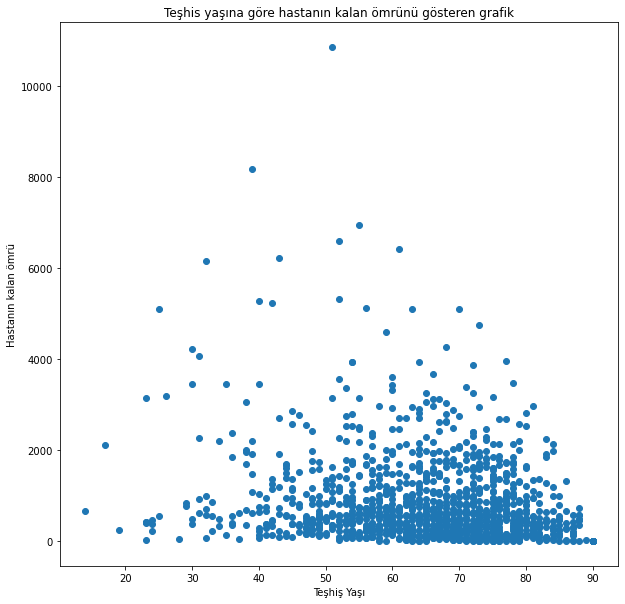

In [13]:
fig = plt.figure(figsize=(10,10))

plt.scatter(cancer.age_at_index, cancer.days_to_death)

plt.title("Teşhis yaşına göre hastanın kalan ömrünü gösteren grafik")
plt.xlabel("Teşhiş Yaşı")
plt.ylabel("Hastanın kalan ömrü")

plt.show()


In [14]:
exposure = pd.read_csv("exposure.tsv", sep="\t")
exposure.set_index("case_submitter_id", inplace=True) #index case_submitter_id olarak değiştirildi
exposure.replace(to_replace =["'--", "Not Reported"], value=np.nan, inplace=True) #Not Reported ve '-- içeren veriler nan olarak değiştirildi
exposure.dropna(1, how="all", inplace=True) #Nan değerler silindi
exposure.dropna(0, how="any", inplace=True)

print(f"Satır sayısı: {exposure.shape[0]}\nSütun sayısı: {exposure.shape[1]}")
exposure.head()

Satır sayısı: 136
Sütun sayısı: 6


,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,
TCGA-2J-AABI,2aaf212f-000a-4a9d-8a4a-198fa94f491e,TCGA-PAAD,Yes,2.3013698630136985,42.0,31.0
TCGA-BB-A6UM,03c3ae62-d0aa-412e-bd3c-4577fc9f919c,TCGA-HNSC,No,5.7534246575342465,105.0,35.0
TCGA-D6-6825,42bc2336-2408-441a-83b9-aadc9700f750,TCGA-HNSC,Yes,16.438356164383563,300.0,54.0
TCGA-CR-7376,b3bed685-e9db-436b-9938-2b8a0a0d5b83,TCGA-HNSC,Yes,2.958904109589041,54.0,18.0
TCGA-CV-7097,9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0


In [15]:
cancer_expousure = pd.merge(cancer, exposure, left_index=True, right_index=True) #cancer ve exposure tabloları birleştirildi
cancer_expousure.cigarettes_per_day = pd.to_numeric(cancer_expousure.cigarettes_per_day)
cancer_expousure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, TCGA-CV-7097 to TCGA-CV-6952
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_at_index                 34 non-null     float64
 1   days_to_death                34 non-null     float64
 2   gender                       34 non-null     object 
 3   vital_status                 34 non-null     object 
 4   year_of_birth                34 non-null     float64
 5   year_of_death                34 non-null     float64
 6   age_at_diagnosis             34 non-null     float64
 7   icd_10_code                  34 non-null     object 
 8   primary_diagnosis            34 non-null     object 
 9   prior_malignancy             34 non-null     object 
 10  prior_treatment              34 non-null     object 
 11  site_of_resection_or_biopsy  34 non-null     object 
 12  tissue_or_organ_of_origin    34 non-null     object 
 13  year_o

In [16]:
alcohol_history = cancer_expousure.alcohol_history == "Yes"
more_than_3 = cancer_expousure.cigarettes_per_day > 3

filtered_cancer_expousure = cancer_expousure[alcohol_history & more_than_3]
filtered_cancer_expousure.head()

,age_at_index,days_to_death,gender,vital_status,year_of_birth,year_of_death,age_at_diagnosis,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53.0,385.0,male,Dead,1949.0,2003.0,19382.0,C14.8,"Squamous cell carcinoma, NOS",no,No,"Overlapping lesion of lip, oral cavity and pha...","Overlapping lesion of lip, oral cavity and pha...",2002.0,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849,64.0,32.0
TCGA-CV-6961,61.0,76.0,male,Dead,1938.0,1999.0,22532.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",1999.0,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.616438,66.0,33.0
TCGA-P3-A6SX,67.0,1430.0,male,Dead,1938.0,2008.0,24715.0,C09.9,"Squamous cell carcinoma, NOS",no,No,"Tonsil, NOS","Tonsil, NOS",2005.0,"Radiation Therapy, NOS",220d75ae-c94b-473a-a988-ac40c15fa219,TCGA-HNSC,Yes,5.479452,100.0,50.0
TCGA-CV-7434,64.0,218.0,male,Dead,1935.0,1999.0,23465.0,C14.8,"Squamous cell carcinoma, NOS",no,No,"Overlapping lesion of lip, oral cavity and pha...","Overlapping lesion of lip, oral cavity and pha...",1999.0,"Radiation Therapy, NOS",63b50e1c-7948-464f-bff1-8e0e5daafcc5,TCGA-HNSC,Yes,4.383562,80.0,40.0
TCGA-IB-AAUQ,50.0,183.0,male,Dead,1963.0,2013.0,18315.0,C25.2,"Infiltrating duct carcinoma, NOS",no,No,Tail of pancreas,Tail of pancreas,2013.0,"Pharmaceutical Therapy, NOS",afe89625-b355-454d-8c0b-b4161edd69f8,TCGA-PAAD,Yes,3.780822,69.0,23.0


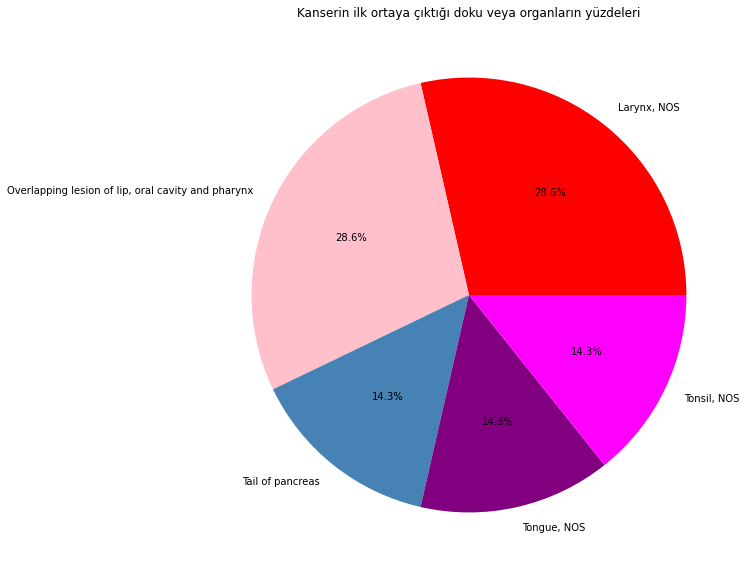

In [17]:
fig = plt.figure(figsize=(10,10))

filtered_cancer_expousure.groupby(by="tissue_or_organ_of_origin").size().plot(kind='pie', autopct='%1.1f%%',
                                                                                colors = ['red', 'pink', 'steelblue', "purple", "magenta"],
                                                                                title='Kanserin ilk ortaya çıktığı doku veya organların yüzdeleri')
plt.axes().set_ylabel('')
plt.show()

In [18]:
cancer.head()

,age_at_index,days_to_death,gender,vital_status,year_of_birth,year_of_death,age_at_diagnosis,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,,,
TCGA-CV-5970,59.0,406.0,male,Dead,1950.0,2010.0,21890.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2009.0,"Radiation Therapy, NOS"
TCGA-2H-A9GO,58.0,494.0,male,Dead,1942.0,2001.0,21486.0,C15.5,"Adenocarcinoma, NOS",no,No,Lower third of esophagus,Lower third of esophagus,2000.0,"Pharmaceutical Therapy, NOS"
TCGA-BA-4074,69.0,462.0,male,Dead,1934.0,2004.0,25282.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2003.0,"Radiation Therapy, NOS"
TCGA-CN-A642,57.0,82.0,male,Dead,1955.0,2012.0,21011.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2012.0,"Radiation Therapy, NOS"
TCGA-BP-5168,75.0,1463.0,male,Dead,1927.0,2006.0,27692.0,C64.9,"Clear cell adenocarcinoma, NOS",yes,No,"Kidney, NOS","Kidney, NOS",2002.0,"Radiation Therapy, NOS"


In [19]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, TCGA-CV-5970 to TCGA-G2-A3IE
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_at_index                 1280 non-null   float64
 1   days_to_death                1280 non-null   float64
 2   gender                       1280 non-null   object 
 3   vital_status                 1280 non-null   object 
 4   year_of_birth                1280 non-null   float64
 5   year_of_death                1280 non-null   float64
 6   age_at_diagnosis             1280 non-null   float64
 7   icd_10_code                  1280 non-null   object 
 8   primary_diagnosis            1280 non-null   object 
 9   prior_malignancy             1280 non-null   object 
 10  prior_treatment              1280 non-null   object 
 11  site_of_resection_or_biopsy  1280 non-null   object 
 12  tissue_or_organ_of_origin    1280 non-null   object 
 13  year

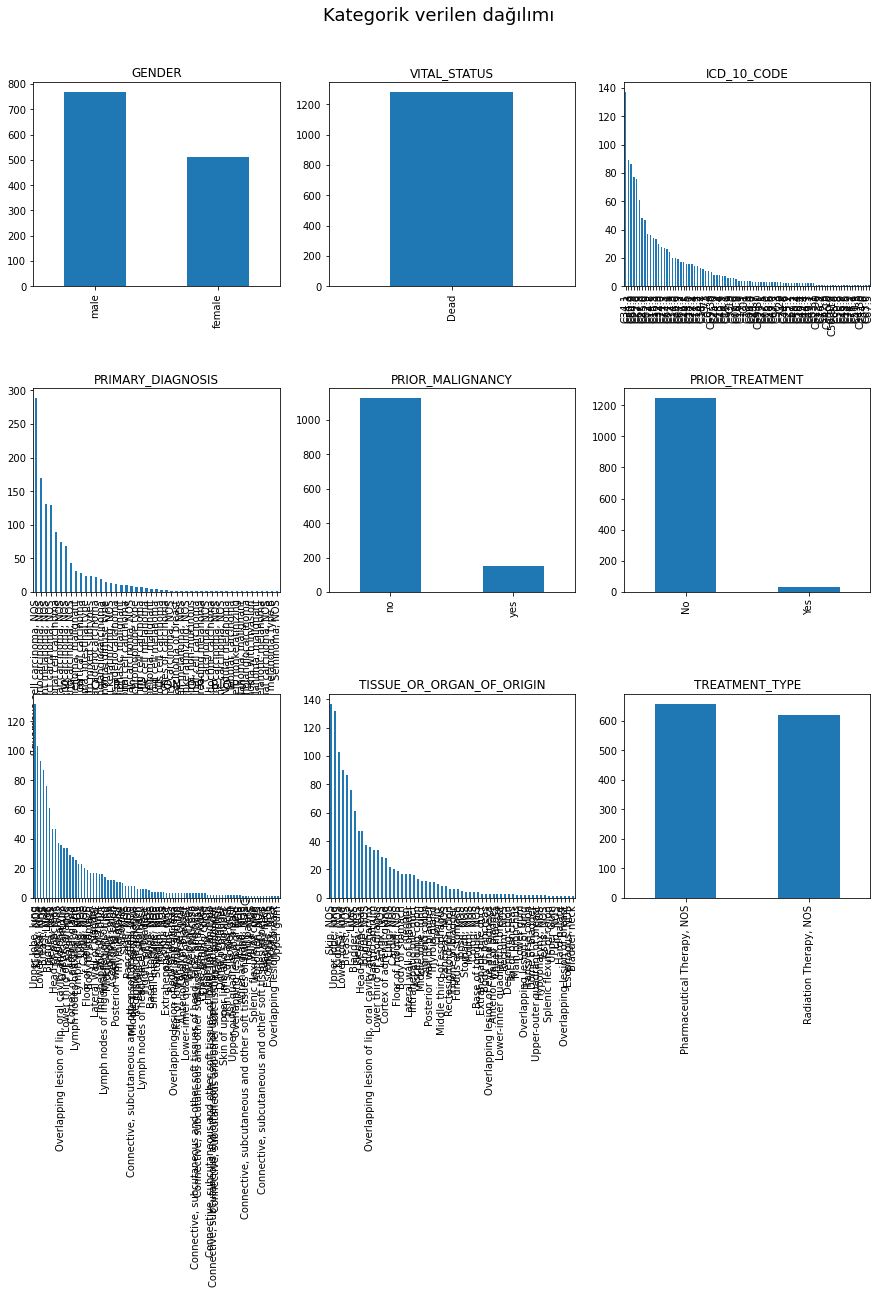

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Kategorik verilen dağılımı", fontsize=18, y=0.95)
for n, column in enumerate(cancer.select_dtypes(['object'])):
    ax = plt.subplot(3, 3, n + 1)
    cancer[column].value_counts().plot(ax=ax, kind=("bar"))
    ax.set_title(column.upper())
plt.show()

In [21]:
# Yukarıdaki tablolardan vital_status kısmı bütün satırlarda aynı veri('Dead') olduğundan bu öznitelik 
# modellerin daha iyi sonuç vermesi için cancer dataframesınden çıkarıldı.
cancer.drop("vital_status", axis = 1, inplace = True)
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_index,1280.0,64.680469,13.134128,14.0,57.00,66.0,74.00,90.0
days_to_death,1280.0,849.221875,988.615980,0.0,239.00,538.5,1090.50,10870.0
year_of_birth,1280.0,1940.378125,13.519077,1902.0,1931.00,1939.0,1949.00,1988.0
year_of_death,1280.0,2006.967187,4.382478,1992.0,2004.00,2008.0,2010.00,2014.0
age_at_diagnosis,1280.0,23807.607031,4794.189210,5383.0,20957.25,24443.5,27237.25,32872.0
year_of_diagnosis,1280.0,2005.058594,5.275417,1978.0,2001.00,2006.0,2009.00,2013.0


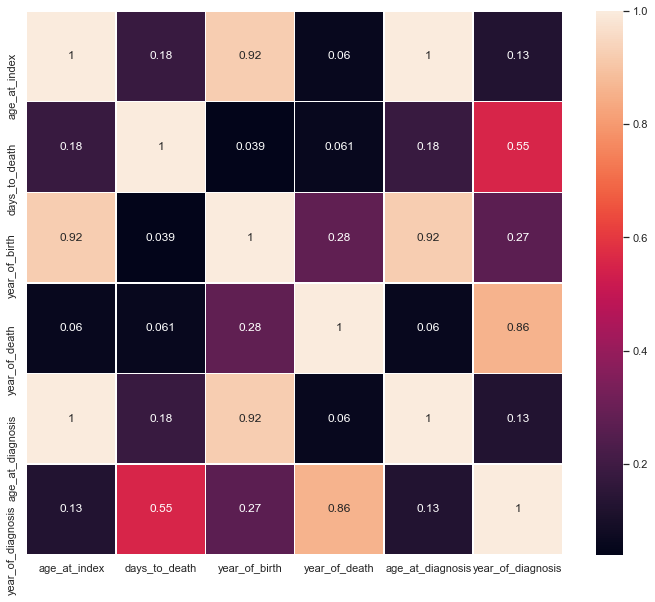

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
corr_cancer = cancer.corr().abs()
sns.heatmap(corr_cancer, annot=True, linewidths=.5)
plt.show()

In [23]:
low_corr = corr_cancer[corr_cancer["days_to_death"] < .05].index
cancer.drop(low_corr, axis=1, inplace=True) # düşük korelasyona sahip sütun silindi, korelasyon bound'ı belirlenirken denemeler yapıldı. year_of_death sütunun korelasyonu düşük olsa dahi modellerin başarısı için öenmli olduğu görülmüştür.
low_corr

Index(['year_of_birth'], dtype='object')

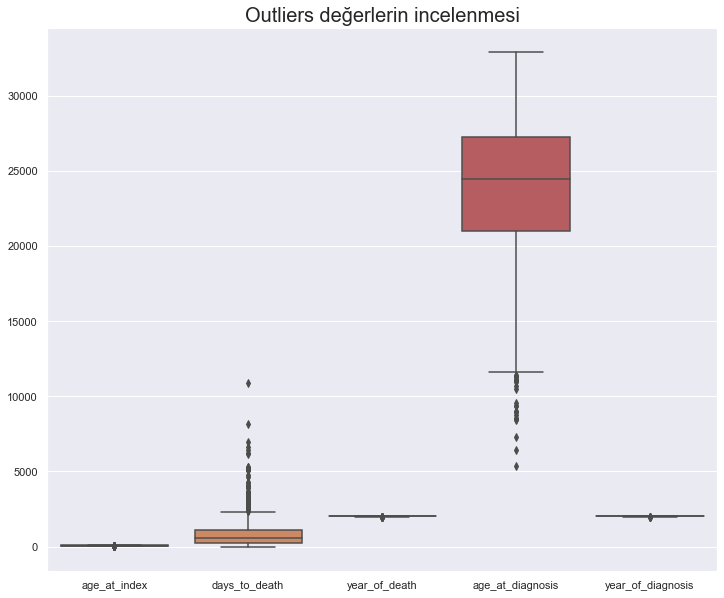

In [24]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.boxplot(data=cancer)
ax.set_title("Outliers değerlerin incelenmesi", fontsize = 20)
plt.show()

In [25]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3): #Outlier değerleri atmak için method oluşturduk
    df = df.copy()
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    return df

cancer_remove_outliers = drop_numerical_outliers(cancer) #Cancer tablosunun yapısını bozmadan outlier kısımları bir başka dataframeye attık
cancer_remove_outliers.head()

,age_at_index,days_to_death,gender,year_of_death,age_at_diagnosis,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,
TCGA-CV-5970,59.0,406.0,male,2010.0,21890.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2009.0,"Radiation Therapy, NOS"
TCGA-2H-A9GO,58.0,494.0,male,2001.0,21486.0,C15.5,"Adenocarcinoma, NOS",no,No,Lower third of esophagus,Lower third of esophagus,2000.0,"Pharmaceutical Therapy, NOS"
TCGA-BA-4074,69.0,462.0,male,2004.0,25282.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2003.0,"Radiation Therapy, NOS"
TCGA-CN-A642,57.0,82.0,male,2012.0,21011.0,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",2012.0,"Radiation Therapy, NOS"
TCGA-BP-5168,75.0,1463.0,male,2006.0,27692.0,C64.9,"Clear cell adenocarcinoma, NOS",yes,No,"Kidney, NOS","Kidney, NOS",2002.0,"Radiation Therapy, NOS"


Text(0.5, 1.0, 'Outliers değerlerinden bazıları silindikten sonra')

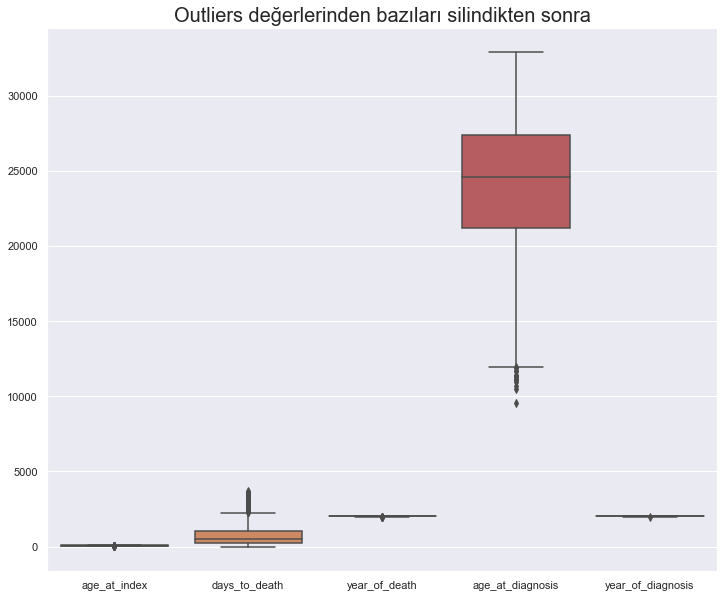

In [26]:
ax = sns.boxplot(data=cancer_remove_outliers)
ax.set_title("Outliers değerlerinden bazıları silindikten sonra", fontsize = 20)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Normalizasyon işlemi için sklearn içerisindeki MinMaxScaler methodunu kullandık
scaled_df_reg = cancer_remove_outliers.copy()

scaled_df_reg[cancer_remove_outliers.select_dtypes(["float64"]).columns] = scaler.fit_transform(cancer_remove_outliers.select_dtypes(["float64"]))
scaled_df_reg.days_to_death = cancer_remove_outliers.days_to_death # hedef ölçeklenmeden konuldu.

scaled_df_reg.head()

,age_at_index,days_to_death,gender,year_of_death,age_at_diagnosis,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,
TCGA-CV-5970,0.515625,406.0,male,0.80,0.529578,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",0.818182,"Radiation Therapy, NOS"
TCGA-2H-A9GO,0.500000,494.0,male,0.35,0.512272,C15.5,"Adenocarcinoma, NOS",no,No,Lower third of esophagus,Lower third of esophagus,0.409091,"Pharmaceutical Therapy, NOS"
TCGA-BA-4074,0.671875,462.0,male,0.50,0.674877,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",0.545455,"Radiation Therapy, NOS"
TCGA-CN-A642,0.484375,82.0,male,0.90,0.491925,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS","Tongue, NOS",0.954545,"Radiation Therapy, NOS"
TCGA-BP-5168,0.765625,1463.0,male,0.60,0.778111,C64.9,"Clear cell adenocarcinoma, NOS",yes,No,"Kidney, NOS","Kidney, NOS",0.500000,"Radiation Therapy, NOS"


In [28]:
final_df_reg = pd.get_dummies(scaled_df_reg,
                         drop_first = True) #birden fazla değişkenin aynı etkiyi vermesi engellemek için performans arttırmak için dummy değer atıldı ve model küçüldü 


final_df_reg.head()

,age_at_index,days_to_death,year_of_death,age_at_diagnosis,year_of_diagnosis,gender_male,icd_10_code_C01,icd_10_code_C02.9,icd_10_code_C03.0,icd_10_code_C03.1,icd_10_code_C04.9,icd_10_code_C05.0,icd_10_code_C06.0,icd_10_code_C06.9,icd_10_code_C09.9,icd_10_code_C13.9,icd_10_code_C14.8,icd_10_code_C15.4,icd_10_code_C15.5,icd_10_code_C15.9,icd_10_code_C16.0,icd_10_code_C16.1,icd_10_code_C16.2,icd_10_code_C16.3,icd_10_code_C16.9,icd_10_code_C17.9,icd_10_code_C18.0,icd_10_code_C18.2,icd_10_code_C18.4,icd_10_code_C18.5,icd_10_code_C18.6,icd_10_code_C18.7,icd_10_code_C18.9,icd_10_code_C19,icd_10_code_C20,icd_10_code_C22.0,icd_10_code_C22.1,icd_10_code_C24.0,icd_10_code_C25.0,icd_10_code_C25.1,icd_10_code_C25.2,icd_10_code_C25.9,icd_10_code_C32.9,icd_10_code_C34.0,icd_10_code_C34.1,icd_10_code_C34.10,icd_10_code_C34.2,icd_10_code_C34.3,icd_10_code_C34.30,icd_10_code_C34.8,icd_10_code_C34.9,icd_10_code_C44.4,icd_10_code_C44.5,icd_10_code_C44.6,icd_10_code_C44.7,icd_10_code_C44.9,icd_10_code_C45.0,icd_10_code_C49.0,icd_10_code_C49.1,icd_10_code_C49.2,icd_10_code_C49.3,icd_10_code_C49.4,icd_10_code_C49.9,icd_10_code_C50.3,icd_10_code_C50.4,icd_10_code_C50.8,icd_10_code_C50.9,icd_10_code_C51.9,icd_10_code_C62.9,icd_10_code_C64.1,icd_10_code_C64.9,icd_10_code_C67.0,icd_10_code_C67.1,icd_10_code_C67.2,icd_10_code_C67.3,icd_10_code_C67.4,icd_10_code_C67.5,icd_10_code_C67.9,icd_10_code_C69.30,icd_10_code_C69.80,icd_10_code_C73,icd_10_code_C74.0,icd_10_code_C74.9,icd_10_code_C76.1,icd_10_code_C77.0,icd_10_code_C77.3,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,"primary_diagnosis_Acral lentiginous melanoma, malignant",primary_diagnosis_Adenocarcinoma with mixed subtypes,"primary_diagnosis_Adenocarcinoma, NOS","primary_diagnosis_Adenocarcinoma, intestinal type",primary_diagnosis_Adrenal cortical carcinoma,primary_diagnosis_Basaloid squamous cell carcinoma,"primary_diagnosis_Bronchiolo-alveolar carcinoma, non-mucinous","primary_diagnosis_Carcinoma, NOS","primary_diagnosis_Carcinoma, diffuse type",primary_diagnosis_Cholangiocarcinoma,"primary_diagnosis_Clear cell adenocarcinoma, NOS",primary_diagnosis_Combined hepatocellular carcinoma and cholangiocarcinoma,"primary_diagnosis_Desmoplastic melanoma, malignant",primary_diagnosis_Epithelioid cell melanoma,"primary_diagnosis_Epithelioid mesothelioma, malignant","primary_diagnosis_Hepatocellular carcinoma, NOS",primary_diagnosis_Infiltrating duct and lobular carcinoma,"primary_diagnosis_Infiltrating duct carcinoma, NOS",primary_diagnosis_Infiltrating duct mixed with other types of carcinoma,primary_diagnosis_Intraductal papillary adenocarcinoma with invasion,primary_diagnosis_Large cell neuroendocrine carcinoma,"primary_diagnosis_Lobular carcinoma, NOS","primary_diagnosis_Malignant melanoma, NOS","primary_diagnosis_Medullary carcinoma, NOS","primary_diagnosis_Mesothelioma, biphasic, malignant","primary_diagnosis_Mesothelioma, malignant","primary_diagnosis_Metaplastic carcinoma, NOS",primary_diagnosis_Mixed epithelioid and spindle cell melanoma,primary_diagnosis_Mucinous adenocarcinoma,primary_diagnosis_Nodular melanoma,primary_diagnosis_Paget disease and infiltrating duct carcinoma of breast,"primary_diagnosis_Papillary adenocarcinoma, NOS",primary_diagnosis_Papillary transitional cell carcinoma,"primary_diagnosis_Renal cell carcinoma, chromophobe type","primary_diagnosis_Seminoma, NOS",primary_diagnosis_Signet ring cell carcinoma,...,"site_of_resection_or_biopsy_Connective, subcutaneous and other soft tissues of upper limb and shoulder","site_of_resection_or_biopsy_Connective, subcutaneous and other soft tissues, NOS",site_of_resection_or_biopsy_Cortex of adrenal gland,site_of_resection_or_biopsy_Descending colon,site_of_resection_or_biopsy_Dome of bladder,"site_of_resection_or_biopsy_Esophagus, NOS",site_of_resection_or_biopsy_Extrahepatic bile duct,"site_of_resection_or_biopsy_Floor of mouth, NOS",site_of_resection_or_biopsy_Fundus of stomach,site_of_resection_or_biopsy_Gastric antrum,site_

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X = final_df_reg.drop('days_to_death',axis=1)
y = final_df_reg['days_to_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [30]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[:20]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '\nFEATURE IMPORTANCE ~ Top 20')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X_train)

linearRegression = LinearRegression()
linearRegression.fit(x_poly,y_train)

x_test_poly = poly_reg.transform(X_test)

results_poly = cross_validate(estimator = linearRegression, X=X, y=y , cv=5)
print("PolynomialRegression Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_poly['test_score'].mean():.2f} ")
print(f"5-fold cross validation accuracy standart sapması: {results_poly['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, linearRegression.predict(x_test_poly)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, linearRegression.predict(x_test_poly)):.2f}") 
print(f"R2 Score: {r2_score(y_test, linearRegression.predict(x_test_poly)):.2f}") 
print(f"Ortalama eğitim süresi: {results_poly['fit_time'].mean():.3f}sn")

PolynomialRegression Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: -1985041433845043784843264.00 
5-fold cross validation accuracy standart sapması: 1483173814207159851810816.00
Mean Squared Error: 700113628817786449684399652864.00
Mean Absolute Error: 242464225819628.44
R2 Score: -1654265886031592785182720.00
Ortalama eğitim süresi: 0.025sn


In [32]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)

results_svr = cross_validate(estimator = svr, X=X, y=y , cv=5)

print("SVR Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_svr['test_score'].mean():.2f} ")
print(f"5-fold cross validation accuracy standart sapması: {results_svr['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, svr.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, svr.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, svr.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_svr['fit_time'].mean():.3f}sn")

SVR Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: -0.10 
5-fold cross validation accuracy standart sapması: 0.03
Mean Squared Error: 467447.48
Mean Absolute Error: 489.84
R2 Score: -0.10
Ortalama eğitim süresi: 0.092sn


In [33]:
from sklearn.linear_model import BayesianRidge

bayesianRidge = BayesianRidge()
bayesianRidge.fit(X_train, y_train)
results_bayesian = cross_validate(estimator = bayesianRidge, X=X, y=y , cv=5)

print("BayesianRidge Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_bayesian['test_score'].mean():.2f} ")
print(f"5-fold cross validation accuracy standart sapması: {results_bayesian['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, bayesianRidge.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, bayesianRidge.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, bayesianRidge.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_bayesian['fit_time'].mean():.3f}sn")

BayesianRidge Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.92 
5-fold cross validation accuracy standart sapması: 0.03
Mean Squared Error: 76385.78
Mean Absolute Error: 131.57
R2 Score: 0.82
Ortalama eğitim süresi: 0.036sn


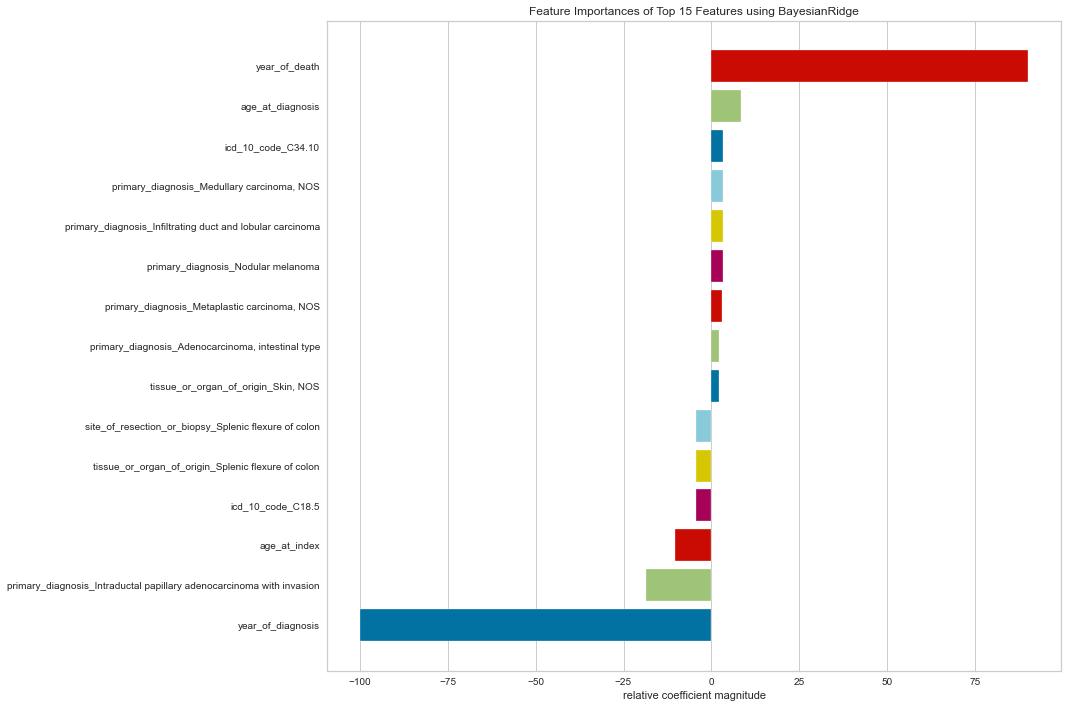

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of Top 15 Features using BayesianRidge'}, xlabel='relative coefficient magnitude'>,
                   estimator=BayesianRidge(), topn=15)

In [34]:
# !pip install yellowbrick
from yellowbrick.model_selection import feature_importances
plt.figure(figsize = (15,10))
feature_importances(bayesianRidge, X, y, topn = 15)

In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
baggingRegressor = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

baggingRegressor.fit(X_train,y_train)
results_bagging = cross_validate(baggingRegressor, X, y, cv=5)

print("BaggingRegressor Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_bagging['test_score'].mean():.2f} ")
print(f"5-fold cross validation accuracy standart sapması: {results_bagging['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, baggingRegressor.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, baggingRegressor.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, baggingRegressor.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_bagging['fit_time'].mean():.3f}sn")

BaggingRegressor Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.92 
5-fold cross validation accuracy standart sapması: 0.01
Mean Squared Error: 84991.06
Mean Absolute Error: 155.66
R2 Score: 0.80
Ortalama eğitim süresi: 0.082sn


In [36]:
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor(random_state=1, n_estimators=100)
randomForestRegressor.fit(X_train,y_train)

results_random_forest = cross_validate(randomForestRegressor, X, y, cv=5)

print("RandomForestRegressor Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_random_forest['test_score'].mean():.2f}",)
print(f"5-fold cross validation accuracy standart sapması: {results_random_forest['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, randomForestRegressor.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, randomForestRegressor.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, randomForestRegressor.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_random_forest['fit_time'].mean():.3f}sn")

RandomForestRegressor Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.93
5-fold cross validation accuracy standart sapması: 0.01
Mean Squared Error: 74631.77
Mean Absolute Error: 146.01
R2 Score: 0.82
Ortalama eğitim süresi: 0.624sn


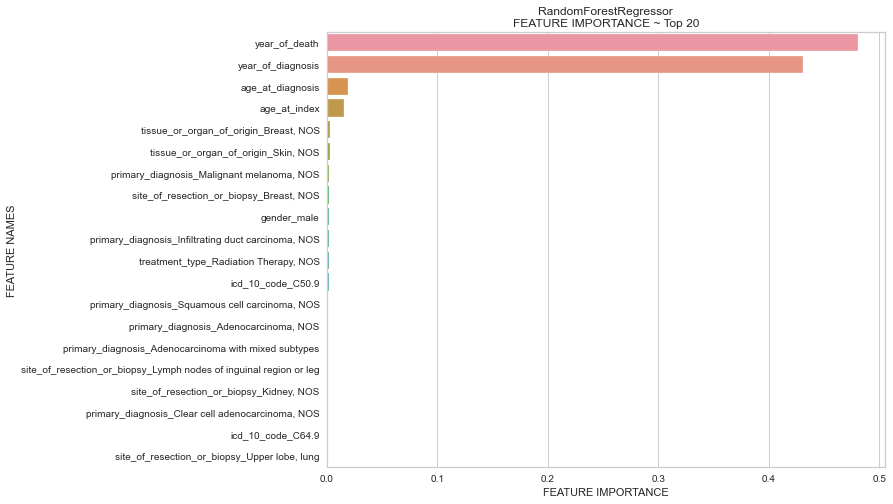

In [37]:
plot_feature_importance(randomForestRegressor.feature_importances_,X.columns,'RandomForestRegressor')
plt.show()

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gradientBoostingRegressor= GradientBoostingRegressor()
gradientBoostingRegressor.fit(X_train,y_train)
results_gradient = cross_validate(gradientBoostingRegressor, X, y, cv=5)

print("GradientBoostingRegressor Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_gradient['test_score'].mean():.2f}")
print(f"5-fold cross validation accuracy standart sapması: {results_gradient['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, gradientBoostingRegressor.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, gradientBoostingRegressor.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, gradientBoostingRegressor.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_gradient['fit_time'].mean():.3f}sn")

GradientBoostingRegressor Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.95
5-fold cross validation accuracy standart sapması: 0.01
Mean Squared Error: 49939.34
Mean Absolute Error: 144.11
R2 Score: 0.88
Ortalama eğitim süresi: 0.273sn


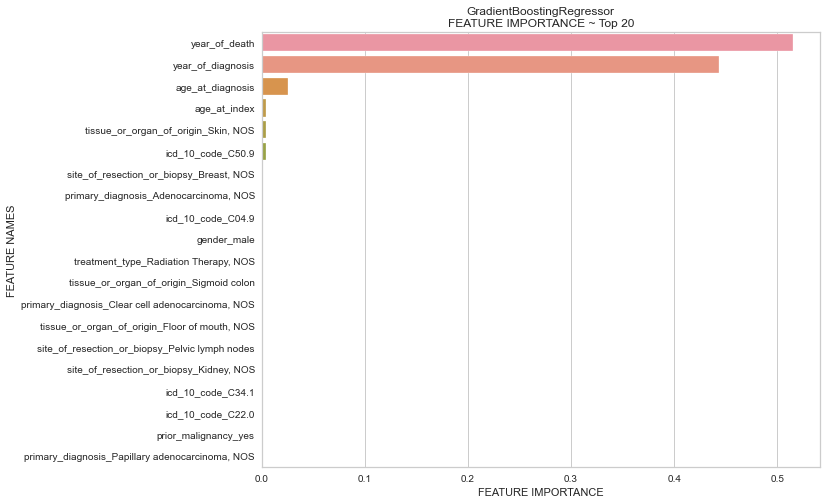

In [39]:
plot_feature_importance(gradientBoostingRegressor.feature_importances_,X.columns,'GradientBoostingRegressor')

In [40]:
# !pip install xgboost
from xgboost import XGBRegressor
xgbRegressor=XGBRegressor()
xgbRegressor.fit(X_train,y_train)
results_xgbRegressor = cross_validate(xgbRegressor, X, y, cv=5)

print("XGBRegressor Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_xgbRegressor['test_score'].mean():.2f}")
print(f"5-fold cross validation accuracy standart sapması: {results_xgbRegressor['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, xgbRegressor.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, xgbRegressor.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, xgbRegressor.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_xgbRegressor['fit_time'].mean():.3f}sn")

XGBRegressor Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.95
5-fold cross validation accuracy standart sapması: 0.01
Mean Squared Error: 47452.95
Mean Absolute Error: 138.36
R2 Score: 0.89
Ortalama eğitim süresi: 0.239sn


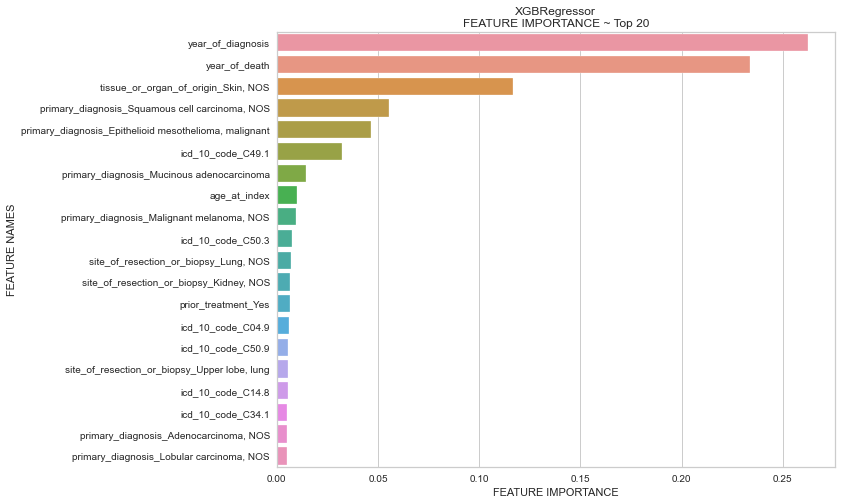

In [41]:
plot_feature_importance(xgbRegressor.feature_importances_,X.columns,'XGBRegressor')

In [42]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(128, 128, 128, 128), activation="relu", solver="lbfgs", random_state=42)
mlp.fit(X_train,y_train)
results_mlp = cross_validate(estimator = mlp, X=X, y=y , cv=5)
print("MLP Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_mlp['test_score'].mean():.2f}")
print(f"5-fold cross validation accuracy standart sapması: {results_mlp['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, mlp.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, mlp.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, mlp.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_mlp['fit_time'].mean():.3f}sn")

MLP Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.90
5-fold cross validation accuracy standart sapması: 0.03
Mean Squared Error: 93107.19
Mean Absolute Error: 168.85
R2 Score: 0.78
Ortalama eğitim süresi: 3.815sn


In [43]:
# !pip install catboost
from catboost import CatBoostRegressor

catBoostRegressor = CatBoostRegressor(depth=10,
                                        l2_leaf_reg=5,
                                        learning_rate=0.1)

catBoostRegressor.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)
results_cat = cross_validate(estimator = catBoostRegressor, X=X, y=y , cv=5)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 719.3081975	test: 621.8240089	best: 621.8240089 (0)	total: 145ms	remaining: 2m 25s
1:	learn: 684.2216968	test: 591.6446469	best: 591.6446469 (1)	total: 154ms	remaining: 1m 16s
2:	learn: 658.1892527	test: 570.7794682	best: 570.7794682 (2)	total: 162ms	remaining: 53.9s
3:	learn: 633.2403743	test: 552.9582104	best: 552.9582104 (3)	total: 170ms	remaining: 42.4s
4:	learn: 608.9404717	test: 533.3315751	best: 533.3315751 (4)	total: 178ms	remaining: 35.4s
5:	learn: 584.8235052	test: 512.6408427	best: 512.6408427 (5)	total: 186ms	remaining: 30.8s
6:	learn: 556.9532749	test: 488.3423657	best: 488.3423657 (6)	total: 194ms	remaining: 27.5s
7:	learn: 533.2153178	test: 466.8206286	best: 466.8206286 (7)	total: 202ms	remaining: 25s
8:	learn: 515.6830077	test: 454.6280035	best: 454.6280035 (8)	total: 209ms	remaining: 23.1s
9:	learn: 498.2067686	test: 441.2256005	best: 441.2256005 (9)	total: 217ms	remaining: 21.5s
10:	learn: 479.4990486	test: 427.4706741	best: 427.4706741 (10)	total: 225ms	rem

In [44]:
print("CatBoostRegressor Sonuçları:")
print("----------------------------")
print(f"5-fold cross validation accuracy ortalaması: {results_cat['test_score'].mean():.2f}")
print(f"5-fold cross validation accuracy standart sapması: {results_cat['test_score'].std():.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, catBoostRegressor.predict(X_test)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, catBoostRegressor.predict(X_test)):.2f}") 
print(f"R2 Score: {r2_score(y_test, catBoostRegressor.predict(X_test)):.2f}") 
print(f"Ortalama eğitim süresi: {results_cat['fit_time'].mean():.3f}sn")

CatBoostRegressor Sonuçları:
----------------------------
5-fold cross validation accuracy ortalaması: 0.95
5-fold cross validation accuracy standart sapması: 0.01
Mean Squared Error: 34422.17
Mean Absolute Error: 133.11
R2 Score: 0.92
Ortalama eğitim süresi: 8.363sn


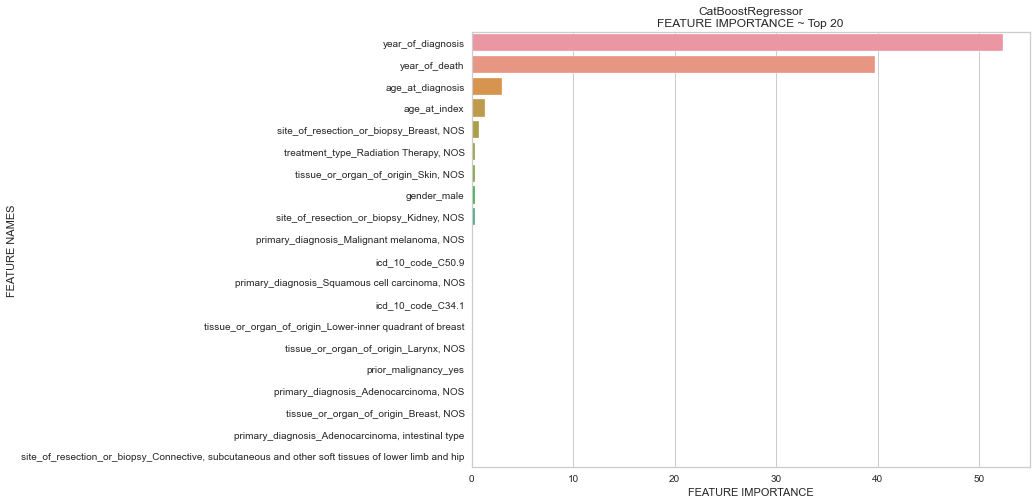

In [45]:
plot_feature_importance(catBoostRegressor.feature_importances_,X.columns,'CatBoostRegressor')

In [46]:
scaled_df_clas = cancer_remove_outliers.copy()

scaled_df_clas[cancer_remove_outliers.select_dtypes(["float64"]).columns] = scaler.fit_transform(cancer_remove_outliers.select_dtypes(["float64"]))

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
sns.set(rc={'figure.figsize':(6,5)})

X = scaled_df_clas.drop('treatment_type',axis=1)
y = scaled_df_clas['treatment_type']

le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(X,
                    drop_first = True) #birden fazla değişkenin aynı etkiyi vermesi engellemek için performans arttırmak için dummy değer atıldı ve model küçüldü 
                    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()


,age_at_index,days_to_death,year_of_death,age_at_diagnosis,year_of_diagnosis,gender_male,icd_10_code_C01,icd_10_code_C02.9,icd_10_code_C03.0,icd_10_code_C03.1,icd_10_code_C04.9,icd_10_code_C05.0,icd_10_code_C06.0,icd_10_code_C06.9,icd_10_code_C09.9,icd_10_code_C13.9,icd_10_code_C14.8,icd_10_code_C15.4,icd_10_code_C15.5,icd_10_code_C15.9,icd_10_code_C16.0,icd_10_code_C16.1,icd_10_code_C16.2,icd_10_code_C16.3,icd_10_code_C16.9,icd_10_code_C17.9,icd_10_code_C18.0,icd_10_code_C18.2,icd_10_code_C18.4,icd_10_code_C18.5,icd_10_code_C18.6,icd_10_code_C18.7,icd_10_code_C18.9,icd_10_code_C19,icd_10_code_C20,icd_10_code_C22.0,icd_10_code_C22.1,icd_10_code_C24.0,icd_10_code_C25.0,icd_10_code_C25.1,icd_10_code_C25.2,icd_10_code_C25.9,icd_10_code_C32.9,icd_10_code_C34.0,icd_10_code_C34.1,icd_10_code_C34.10,icd_10_code_C34.2,icd_10_code_C34.3,icd_10_code_C34.30,icd_10_code_C34.8,icd_10_code_C34.9,icd_10_code_C44.4,icd_10_code_C44.5,icd_10_code_C44.6,icd_10_code_C44.7,icd_10_code_C44.9,icd_10_code_C45.0,icd_10_code_C49.0,icd_10_code_C49.1,icd_10_code_C49.2,icd_10_code_C49.3,icd_10_code_C49.4,icd_10_code_C49.9,icd_10_code_C50.3,icd_10_code_C50.4,icd_10_code_C50.8,icd_10_code_C50.9,icd_10_code_C51.9,icd_10_code_C62.9,icd_10_code_C64.1,icd_10_code_C64.9,icd_10_code_C67.0,icd_10_code_C67.1,icd_10_code_C67.2,icd_10_code_C67.3,icd_10_code_C67.4,icd_10_code_C67.5,icd_10_code_C67.9,icd_10_code_C69.30,icd_10_code_C69.80,icd_10_code_C73,icd_10_code_C74.0,icd_10_code_C74.9,icd_10_code_C76.1,icd_10_code_C77.0,icd_10_code_C77.3,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,"primary_diagnosis_Acral lentiginous melanoma, malignant",primary_diagnosis_Adenocarcinoma with mixed subtypes,"primary_diagnosis_Adenocarcinoma, NOS","primary_diagnosis_Adenocarcinoma, intestinal type",primary_diagnosis_Adrenal cortical carcinoma,primary_diagnosis_Basaloid squamous cell carcinoma,"primary_diagnosis_Bronchiolo-alveolar carcinoma, non-mucinous","primary_diagnosis_Carcinoma, NOS","primary_diagnosis_Carcinoma, diffuse type",primary_diagnosis_Cholangiocarcinoma,"primary_diagnosis_Clear cell adenocarcinoma, NOS",primary_diagnosis_Combined hepatocellular carcinoma and cholangiocarcinoma,"primary_diagnosis_Desmoplastic melanoma, malignant",primary_diagnosis_Epithelioid cell melanoma,"primary_diagnosis_Epithelioid mesothelioma, malignant","primary_diagnosis_Hepatocellular carcinoma, NOS",primary_diagnosis_Infiltrating duct and lobular carcinoma,"primary_diagnosis_Infiltrating duct carcinoma, NOS",primary_diagnosis_Infiltrating duct mixed with other types of carcinoma,primary_diagnosis_Intraductal papillary adenocarcinoma with invasion,primary_diagnosis_Large cell neuroendocrine carcinoma,"primary_diagnosis_Lobular carcinoma, NOS","primary_diagnosis_Malignant melanoma, NOS","primary_diagnosis_Medullary carcinoma, NOS","primary_diagnosis_Mesothelioma, biphasic, malignant","primary_diagnosis_Mesothelioma, malignant","primary_diagnosis_Metaplastic carcinoma, NOS",primary_diagnosis_Mixed epithelioid and spindle cell melanoma,primary_diagnosis_Mucinous adenocarcinoma,primary_diagnosis_Nodular melanoma,primary_diagnosis_Paget disease and infiltrating duct carcinoma of breast,"primary_diagnosis_Papillary adenocarcinoma, NOS",primary_diagnosis_Papillary transitional cell carcinoma,"primary_diagnosis_Renal cell carcinoma, chromophobe type","primary_diagnosis_Seminoma, NOS",primary_diagnosis_Signet ring cell carcinoma,...,"site_of_resection_or_biopsy_Connective, subcutaneous and other soft tissues of thorax","site_of_resection_or_biopsy_Connective, subcutaneous and other soft tissues of upper limb and shoulder","site_of_resection_or_biopsy_Connective, subcutaneous and other soft tissues, NOS",site_of_resection_or_biopsy_Cortex of adrenal gland,site_of_resection_or_biopsy_Descending colon,site_of_resection_or_biopsy_Dome of bladder,"site_of_resection_or_biopsy_Esophagus, NOS",site_of_resection_or_biopsy_Extrahepatic bile duct,"site_of_resection_or_biopsy_Floor of mouth, NOS",site_o

In [48]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

params = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-4,4,25),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
gscv_logistic = GridSearchCV(logisticRegression , param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="f1")
gscv_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1', verbose=True)

Best parameters: {'C': 0.46415888336127775, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy Score: 0.48
Precision Score: 0.45
Recall Score: 0.44
F1 Score: 0.45
Train Data Accuracy Score: 0.63


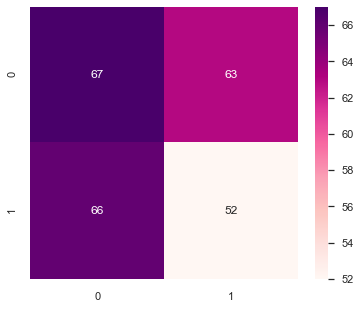

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Best parameters: {gscv_logistic.best_params_}") # ideal parametreler
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=gscv_logistic.predict(X_test)):.2f}")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=gscv_logistic.predict(X_test)):.2f}")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=gscv_logistic.predict(X_test)):.2f}")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=gscv_logistic.predict(X_test)):.2f}")

print(f"Train Data Accuracy Score: {accuracy_score(y_true=y_train, y_pred=gscv_logistic.predict(X_train)):.2f}")

cm = confusion_matrix(y_true=y_test, y_pred=gscv_logistic.predict(X_test))

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(cm, annot=True, fmt="", cmap='RdPu')
plt.show()

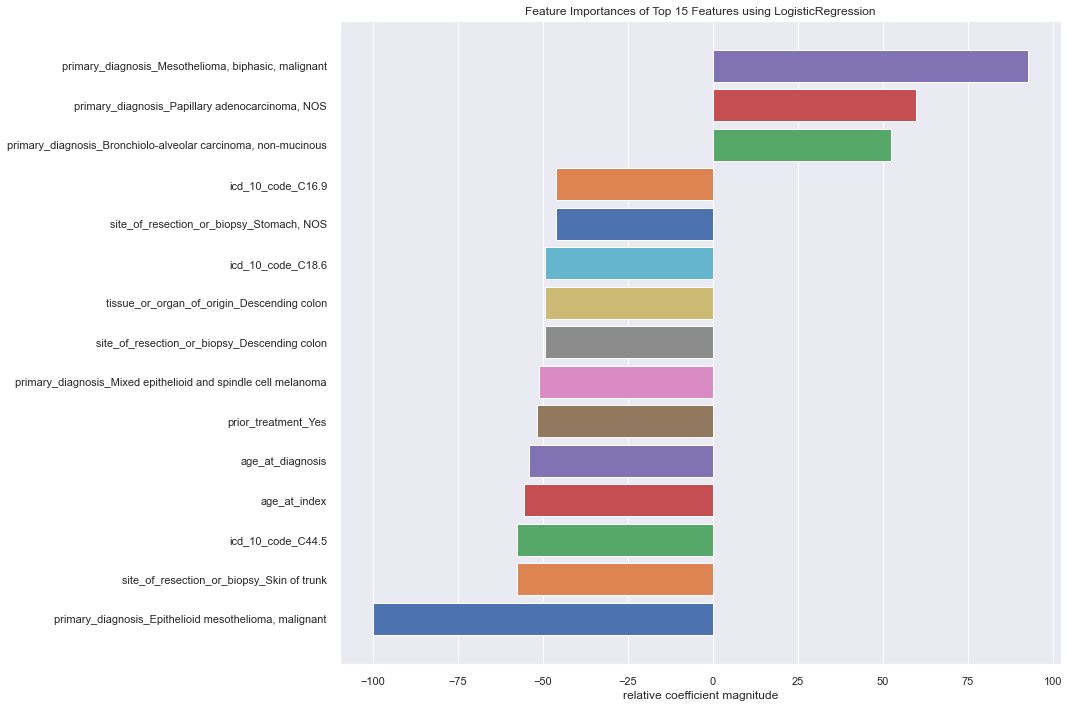

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of Top 15 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(C=0.46415888336127775,
                                                solver='newton-cg'),
                   topn=15)

In [50]:
plt.figure(figsize = (15,10))
feature_importances(gscv_logistic.best_estimator_, X, y, topn = 15)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

kNeighborsClassifier = KNeighborsClassifier()

params = {
    'n_neighbors': range(1,31,2),
    'leaf_size': range(10,100,10), 
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

gscv_kNN = GridSearchCV(kNeighborsClassifier , param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="f1")
gscv_kNN.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 100, 10),
                         'n_neighbors': range(1, 31, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=True)

Best parameters: {'leaf_size': 10, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
Accuracy Score: 0.44
Precision Score: 0.41
Recall Score: 0.42
F1 Score: 0.42
Train Accuracy Score: 0.58


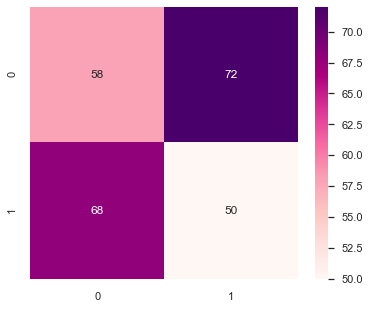

In [52]:
print(f"Best parameters: {gscv_kNN.best_params_}") # ideal parametreler
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=gscv_kNN.predict(X_test)):.2f}")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=gscv_kNN.predict(X_test)):.2f}")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=gscv_kNN.predict(X_test)):.2f}")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=gscv_kNN.predict(X_test)):.2f}")

print(f"Train Accuracy Score: {accuracy_score(y_true=y_train, y_pred=gscv_kNN.predict(X_train)):.2f}")

cm = confusion_matrix(y_true=y_test, y_pred=gscv_kNN.predict(X_test))

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(cm, annot=True, fmt="", cmap='RdPu')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier()

params = { 
    'n_estimators': range(10,100,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(4,20,2),
    'criterion' :['gini', 'entropy']
}

gscv_randomForestClassifier = GridSearchCV(randomForestClassifier, param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="f1")
gscv_randomForestClassifier.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 100, 10)},
             scoring='f1', verbose=True)

Best parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 10}
Accuracy Score: 0.46
Precision Score: 0.44
Recall Score: 0.53
F1 Score: 0.48
Train Accuracy Score: 0.88


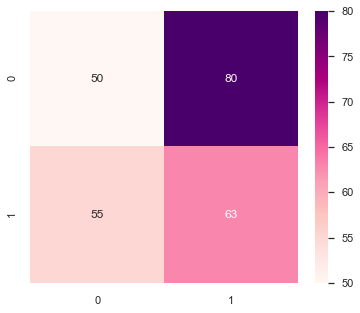

In [54]:
print(f"Best parameters: {gscv_randomForestClassifier.best_params_}") # ideal parametreler
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=gscv_randomForestClassifier.predict(X_test)):.2f}")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=gscv_randomForestClassifier.predict(X_test)):.2f}")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=gscv_randomForestClassifier.predict(X_test)):.2f}")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=gscv_randomForestClassifier.predict(X_test)):.2f}")

print(f"Train Accuracy Score: {accuracy_score(y_true=y_train, y_pred=gscv_randomForestClassifier.predict(X_train)):.2f}") # overfitting durumu

cm = confusion_matrix(y_true=y_test, y_pred=gscv_randomForestClassifier.predict(X_test))

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(cm, annot=True, fmt="", cmap='RdPu')
plt.show()

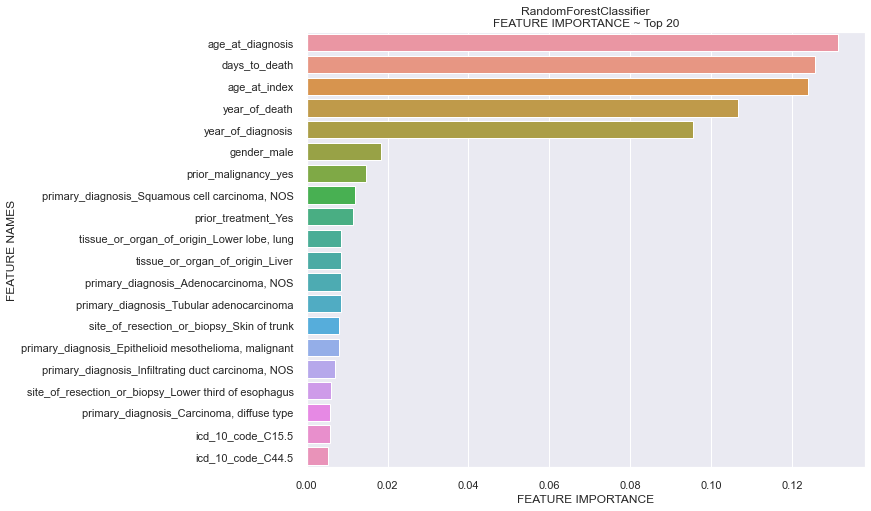

In [55]:
sns.set(rc={'figure.figsize':(12,10)})
plot_feature_importance(gscv_randomForestClassifier.best_estimator_.feature_importances_,X.columns,'RandomForestClassifier')

In [56]:
# !pip install xgboost
from xgboost import XGBRFClassifier
xgbrfClassifier=XGBRFClassifier()
params = {
    'max_depth': range (1,40,5),
    'n_estimators': range(75,150,10),
    'learning_rate': [1,0.5,0.3,0.1]
}
gscv_xgbrf = GridSearchCV(xgbrfClassifier, param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="f1")
gscv_xgbrf.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, gamma=None,
                                       gpu_id=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_to_onehot=None,
                                       max_delta_step=None, ma...
                                       missing=nan, monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=None,
                                       reg_alpha=None, sampling_method=None,
                                       scale_pos_weight=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.3, 0.1],
                         'max_depth': range(1, 40, 5),
                         'n_estimators': range(75, 150, 10)},
             scoring='f1', verbose=True)

Best parameters: {'learning_rate': 1, 'max_depth': 21, 'n_estimators': 105}
Accuracy Score: 0.50
Precision Score: 0.48
Recall Score: 0.53
F1 Score: 0.51
Train Accuracy Score: 0.98


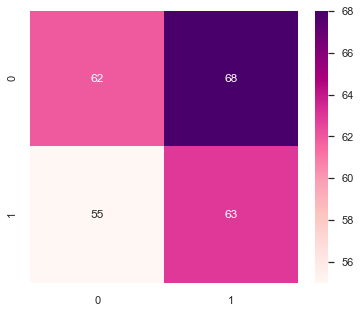

In [57]:
print(f"Best parameters: {gscv_xgbrf.best_params_}") # ideal parametreler
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=gscv_xgbrf.predict(X_test)):.2f}")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=gscv_xgbrf.predict(X_test)):.2f}")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=gscv_xgbrf.predict(X_test)):.2f}")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=gscv_xgbrf.predict(X_test)):.2f}")

print(f"Train Accuracy Score: {accuracy_score(y_true=y_train, y_pred=gscv_xgbrf.predict(X_train)):.2f}") # overfitting durumu

sns.set(rc={'figure.figsize':(6,5)})
cm = confusion_matrix(y_true=y_test, y_pred=gscv_xgbrf.predict(X_test))
sns.heatmap(cm, annot=True , fmt = '', cmap='RdPu')
plt.show()

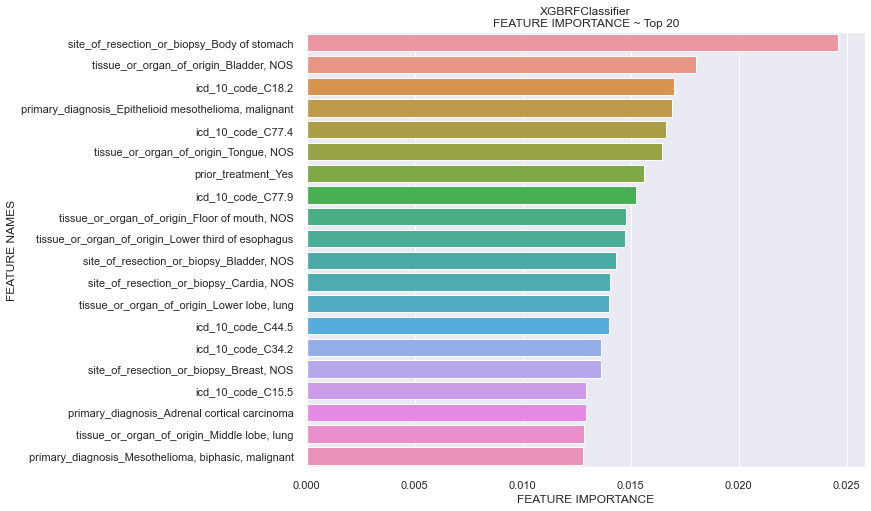

In [58]:
sns.set(rc={'figure.figsize':(12,10)})
plot_feature_importance(gscv_xgbrf.best_estimator_.feature_importances_,X.columns,'XGBRFClassifier')

In [ ]:
from catboost import CatBoostClassifier

catBoostClassifier = CatBoostClassifier()

params = {'learning_rate': [0.03, 0.1],
         'depth': [4, 6, 10],
         'l2_leaf_reg': [1, 3, 5, 7]
}

gscv_catboost = GridSearchCV(catBoostClassifier, param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="f1")
gscv_catboost.fit(X_train,y_train)

Best parameters: {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Accuracy Score: 0.48
Precision Score: 0.46
Recall Score: 0.45
F1 Score: 0.45
Train Accuracy Score: 1.00


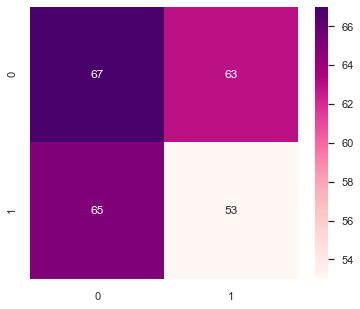

In [60]:
print(f"Best parameters: {gscv_catboost.best_params_}") # ideal parametreler
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=gscv_catboost.predict(X_test)):.2f}")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=gscv_catboost.predict(X_test)):.2f}")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=gscv_catboost.predict(X_test)):.2f}")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=gscv_catboost.predict(X_test)):.2f}")

print(f"Train Accuracy Score: {accuracy_score(y_true=y_train, y_pred=gscv_catboost.predict(X_train)):.2f}") # overfitting durumu

sns.set(rc={'figure.figsize':(6,5)})
cm = confusion_matrix(y_true=y_test, y_pred=gscv_catboost.predict(X_test))
sns.heatmap(cm, annot=True , fmt = '', cmap='RdPu')
plt.show()

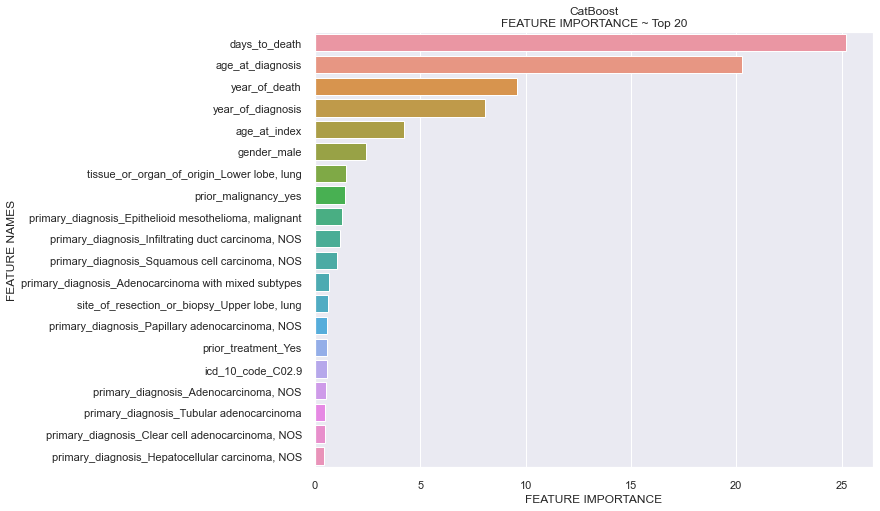

In [61]:
sns.set(rc={'figure.figsize':(12,10)})
plot_feature_importance(gscv_catboost.best_estimator_.feature_importances_,X.columns,'CatBoost')